# **Pengumpulan Data Saham**

In [1]:
import yfinance as yf

# Mengambil data saham
ticker = ['BBCA.JK']

data_harian = yf.download(ticker, start='2023-12-01', end='2024-12-01', interval='1d')['Adj Close']
print()
print(data_harian)

[*********************100%***********************]  1 of 1 completed


Ticker           BBCA.JK
Date                    
2023-12-01   8663.650391
2023-12-04   8680.670898
2023-12-05   8656.355469
2023-12-06   8559.092773
2023-12-07   8583.408203
...                  ...
2024-11-22   9850.000000
2024-11-25  10175.000000
2024-11-26  10000.000000
2024-11-28  10000.000000
2024-11-29  10000.000000

[237 rows x 1 columns]


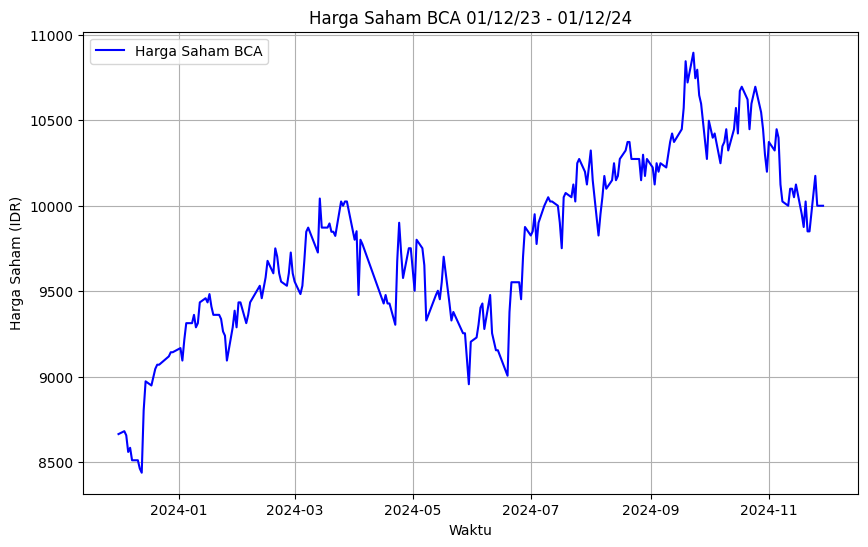

In [39]:
import matplotlib.pyplot as plt

# Plot grafik saham
plt.figure(figsize=(10, 6))
plt.plot(data_harian, label='Harga Saham BCA', color='blue')
plt.title('Harga Saham BCA 01/12/23 - 01/12/24')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham (IDR)')
plt.legend()
plt.grid()
plt.show()

# **Preprocessing Data**

## Assessing Data

In [2]:
# Memeriksa missing value
data_harian.isna().sum()

,0
Ticker,
BBCA.JK,0


In [3]:
# Melihat parameter statistik data
data_harian.describe()

Ticker,BBCA.JK
count,237.000000
mean,9791.703372
std,520.157528
min,8437.514648
25%,9427.977539
50%,9847.820312
75%,10199.130859
max,10895.657227


# Cleaning Data

In [4]:
# Menghapus missing value (nilai NaN) jika ada
data_harian = data_harian.dropna()

# Normalisasi Data

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Melakukan normalisasi data ke rentang [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_harian.values.reshape(-1, 1))

# Menampilkan data normalisasi
print(normalized_data)

[[0.09199456]
 [0.09891869]
 [0.0890269 ]
 [0.04945935]
 [0.05935114]
 [0.02967577]
 [0.02967577]
 [0.00989179]
 [0.        ]
 [0.14837804]
 [0.21762096]
 [0.20772917]
 [0.22751275]
 [0.24729673]
 [0.25718852]
 [0.25718852]
 [0.2769721 ]
 [0.28686429]
 [0.28686429]
 [0.29675608]
 [0.26708031]
 [0.31653966]
 [0.35610721]
 [0.35610721]
 [0.37589119]
 [0.34621542]
 [0.35610721]
 [0.40556616]
 [0.41545835]
 [0.40556616]
 [0.42535014]
 [0.39567477]
 [0.37589119]
 [0.37589119]
 [0.365999  ]
 [0.33632363]
 [0.32643145]
 [0.26708031]
 [0.34621542]
 [0.38578298]
 [0.34621542]
 [0.40556616]
 [0.40556616]
 [0.35610721]
 [0.37589119]
 [0.40556616]
 [0.44513372]
 [0.41545835]
 [0.4649177 ]
 [0.50448525]
 [0.47480949]
 [0.53416062]
 [0.51437704]
 [0.47480949]
 [0.45502551]
 [0.44513372]
 [0.47480949]
 [0.52426883]
 [0.47480949]
 [0.45502551]
 [0.42535014]
 [0.44513372]
 [0.50448525]
 [0.57372818]
 [0.58361997]
 [0.52426883]
 [0.65286289]
 [0.58361997]
 [0.58361997]
 [0.59351216]
 [0.57372818]
 [0.57

# Membuat Window untuk Data Time Series

In [6]:
# Window Data Time Series untuk memprediksi harga saham berikutnya

import numpy as np

# X: data input model selama window_size hari terakhir
# y: harga saham pada hari ke-i

X, y = [], []
window_size = 60
for i in range(window_size, len(normalized_data)):
    X.append(normalized_data[i-window_size:i, 0])
    y.append(normalized_data[i, 0])

X = np.array(X)
y = np.array(y)

In [7]:
print(X)

[[0.09199456 0.09891869 0.0890269  ... 0.52426883 0.47480949 0.45502551]
 [0.09891869 0.0890269  0.04945935 ... 0.47480949 0.45502551 0.42535014]
 [0.0890269  0.04945935 0.05935114 ... 0.45502551 0.42535014 0.44513372]
 ...
 [0.72676508 0.68628617 0.73688491 ... 0.5746149  0.5746149  0.70682855]
 [0.68628617 0.73688491 0.71664525 ... 0.5746149  0.70682855 0.63563658]
 [0.73688491 0.71664525 0.73688491 ... 0.70682855 0.63563658 0.63563658]]


In [8]:
print(y)

[0.42535014 0.44513372 0.50448525 0.57372818 0.58361997 0.52426883
 0.65286289 0.58361997 0.58361997 0.59351216 0.57372818 0.57372818
 0.56383639 0.64580686 0.63568704 0.64580686 0.64580686 0.55472843
 0.57496808 0.42317108 0.55472843 0.5446086  0.40293142 0.42317108
 0.40293142 0.40293142 0.35233229 0.50412929 0.59520773 0.52436895
 0.46365038 0.53448877 0.53448877 0.4332909  0.55472843 0.53448877
 0.49400947 0.36245212 0.42317108 0.4332909  0.41305125 0.45353056
 0.51424912 0.40293142 0.36245212 0.38269177 0.33209264 0.33209264
 0.27137408 0.21065512 0.31185299 0.32197281 0.35233229 0.3928116
 0.40293142 0.34221247 0.42317108 0.33209264 0.31185299 0.29161333
 0.29161333 0.23089477 0.38269177 0.45353056 0.45353056 0.45353056
 0.41305125 0.51424912 0.58508791 0.56484825 0.57496808 0.61544739
 0.5446086  0.59520773 0.63568704 0.64580686 0.65592669 0.64580686
 0.64580686 0.63568704 0.59520773 0.53448877 0.65592669 0.66604652
 0.65592669 0.68628617 0.64580686 0.73688491 0.74700473 0.71664

# Split Data Training dan Data Testing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [10]:
print(X_train)

[[0.09199456 0.09891869 0.0890269  ... 0.52426883 0.47480949 0.45502551]
 [0.09891869 0.0890269  0.04945935 ... 0.47480949 0.45502551 0.42535014]
 [0.0890269  0.04945935 0.05935114 ... 0.45502551 0.42535014 0.44513372]
 ...
 [0.29161333 0.23089477 0.38269177 ... 0.71664525 0.73688491 0.72676508]
 [0.23089477 0.38269177 0.45353056 ... 0.73688491 0.72676508 0.75712456]
 [0.38269177 0.45353056 0.45353056 ... 0.72676508 0.75712456 0.78748404]]


In [11]:
print(X_test)

[[0.45353056 0.45353056 0.45353056 ... 0.75712456 0.78748404 0.80772369]
 [0.45353056 0.45353056 0.41305125 ... 0.78748404 0.80772369 0.78748404]
 [0.45353056 0.41305125 0.51424912 ... 0.80772369 0.78748404 0.81784352]
 ...
 [0.72676508 0.68628617 0.73688491 ... 0.5746149  0.5746149  0.70682855]
 [0.68628617 0.73688491 0.71664525 ... 0.5746149  0.70682855 0.63563658]
 [0.73688491 0.71664525 0.73688491 ... 0.70682855 0.63563658 0.63563658]]


In [12]:
print(y_train)

[0.42535014 0.44513372 0.50448525 0.57372818 0.58361997 0.52426883
 0.65286289 0.58361997 0.58361997 0.59351216 0.57372818 0.57372818
 0.56383639 0.64580686 0.63568704 0.64580686 0.64580686 0.55472843
 0.57496808 0.42317108 0.55472843 0.5446086  0.40293142 0.42317108
 0.40293142 0.40293142 0.35233229 0.50412929 0.59520773 0.52436895
 0.46365038 0.53448877 0.53448877 0.4332909  0.55472843 0.53448877
 0.49400947 0.36245212 0.42317108 0.4332909  0.41305125 0.45353056
 0.51424912 0.40293142 0.36245212 0.38269177 0.33209264 0.33209264
 0.27137408 0.21065512 0.31185299 0.32197281 0.35233229 0.3928116
 0.40293142 0.34221247 0.42317108 0.33209264 0.31185299 0.29161333
 0.29161333 0.23089477 0.38269177 0.45353056 0.45353056 0.45353056
 0.41305125 0.51424912 0.58508791 0.56484825 0.57496808 0.61544739
 0.5446086  0.59520773 0.63568704 0.64580686 0.65592669 0.64580686
 0.64580686 0.63568704 0.59520773 0.53448877 0.65592669 0.66604652
 0.65592669 0.68628617 0.64580686 0.73688491 0.74700473 0.71664

In [13]:
print(y_test)

[0.78748404 0.81784352 0.86844265 0.97976035 0.92916121 1.
 0.93928104 0.95952069 0.89880213 0.87856248 0.74700473 0.83808317
 0.81784352 0.79760387 0.80772369 0.73688491 0.77736421 0.78748404
 0.81784352 0.76724439 0.81784352 0.86844265 0.80772369 0.90892196
 0.91904139 0.88868231 0.81784352 0.87856248 0.89880213 0.91904139
 0.85832283 0.81784352 0.75712456 0.71664525 0.78748404 0.76724439
 0.81784352 0.79760387 0.68628617 0.64580686 0.63568704 0.67616634
 0.67616634 0.65592669 0.68628617 0.61544739 0.58508791 0.64580686
 0.5746149  0.5746149  0.70682855 0.63563658 0.63563658 0.63563658]


# Mengubah Bentuk Data

In [14]:
# mengubah bentuk data untuk model LSTM [samples, time_steps, features]
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

In [15]:
print(X_train)

[[[0.09199456]
  [0.09891869]
  [0.0890269 ]
  ...
  [0.52426883]
  [0.47480949]
  [0.45502551]]

 [[0.09891869]
  [0.0890269 ]
  [0.04945935]
  ...
  [0.47480949]
  [0.45502551]
  [0.42535014]]

 [[0.0890269 ]
  [0.04945935]
  [0.05935114]
  ...
  [0.45502551]
  [0.42535014]
  [0.44513372]]

 ...

 [[0.29161333]
  [0.23089477]
  [0.38269177]
  ...
  [0.71664525]
  [0.73688491]
  [0.72676508]]

 [[0.23089477]
  [0.38269177]
  [0.45353056]
  ...
  [0.73688491]
  [0.72676508]
  [0.75712456]]

 [[0.38269177]
  [0.45353056]
  [0.45353056]
  ...
  [0.72676508]
  [0.75712456]
  [0.78748404]]]


In [16]:
print(X_test)

[[[0.45353056]
  [0.45353056]
  [0.45353056]
  ...
  [0.75712456]
  [0.78748404]
  [0.80772369]]

 [[0.45353056]
  [0.45353056]
  [0.41305125]
  ...
  [0.78748404]
  [0.80772369]
  [0.78748404]]

 [[0.45353056]
  [0.41305125]
  [0.51424912]
  ...
  [0.80772369]
  [0.78748404]
  [0.81784352]]

 ...

 [[0.72676508]
  [0.68628617]
  [0.73688491]
  ...
  [0.5746149 ]
  [0.5746149 ]
  [0.70682855]]

 [[0.68628617]
  [0.73688491]
  [0.71664525]
  ...
  [0.5746149 ]
  [0.70682855]
  [0.63563658]]

 [[0.73688491]
  [0.71664525]
  [0.73688491]
  ...
  [0.70682855]
  [0.63563658]
  [0.63563658]]]


# **Membangun Model LSTM**

In [17]:
# Model LSTM

import tensorflow as tf

model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.Input(shape=(window_size, 1)),

    # LSTM layer pertama
    tf.keras.layers.LSTM(120, return_sequences=True),
    tf.keras.layers.Dropout(0.2),

    # LSTM layer kedua
    tf.keras.layers.LSTM(120, return_sequences=False),
    tf.keras.layers.Dropout(0.2),

    # Output layer
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Menampilkan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 120)             │          58,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 120)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 120)                 │         115,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,361 (681.10 KB)

 Trainable params: 174,361 (681.10 KB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [18]:
# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - loss: 0.1916 - mae: 0.3984 - val_loss: 0.0266 - val_mae: 0.1585
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0217 - mae: 0.1177 - val_loss: 0.0294 - val_mae: 0.1678
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0222 - mae: 0.1248 - val_loss: 0.0446 - val_mae: 0.2083
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0213 - mae: 0.1236 - val_loss: 0.0019 - val_mae: 0.0344
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 0.0122 - mae: 0.0893 - val_loss: 0.0017 - val_mae: 0.0360
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 0.0132 - mae: 0.0956 - val_loss: 0.0124 - val_mae: 0.1059
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - loss: 0.0108 - mae: 0.0895 - val_loss: 0.0126 - val_mae: 0.1067
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0101 - mae: 0.0830 - val_loss: 0.0013 - val_mae: 0.0282
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0123 - mae: 

# **Evaluasi Model**

In [19]:
# Evaluasi nilai loss dan mae model
test_loss, test_mae = model.evaluate(X_test, y_test)

# Menampilkan nilai loss dan mae
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0060 - mae: 0.0622
Test Loss (MSE): 0.0057324920780956745
Test MAE: 0.0610673762857914


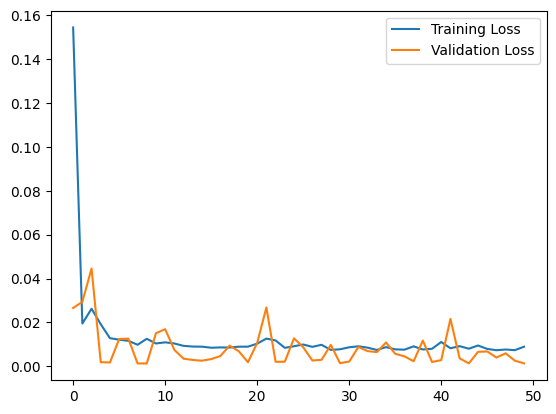

In [40]:
# Visualisasi performa model

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# **Prediksi**

In [21]:
# Melakukan prediksi
prediksi = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step


In [22]:
# Mengembalikan ke skala awal
hasil_prediksi = scaler.inverse_transform(prediksi)
hasil_aktual = scaler.inverse_transform(y_test.reshape(-1, 1))

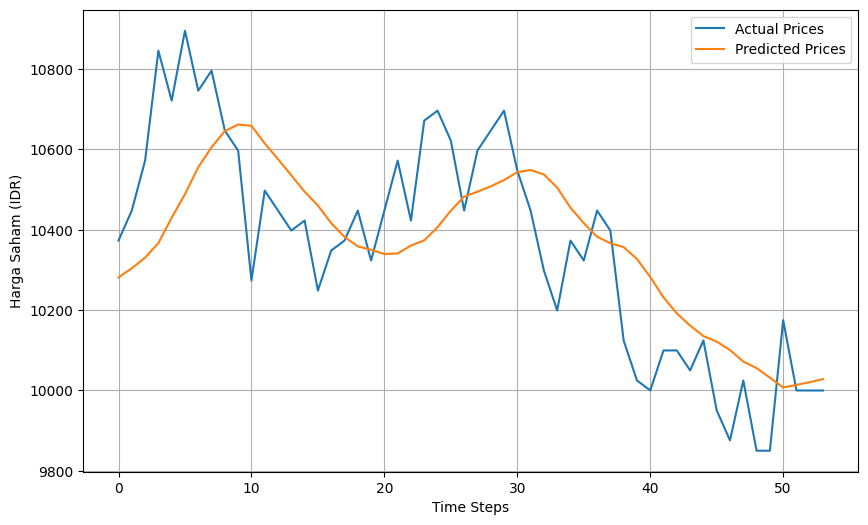

In [28]:
# Visualisasi prediksi harga saham dan harga saham sebenarnya
plt.figure(figsize=(10, 6))
plt.plot(hasil_aktual, label='Actual Prices')
plt.plot(hasil_prediksi, label='Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Harga Saham (IDR)')
plt.legend()
plt.grid()
plt.show()

In [24]:
# Menentukan Mean Absolute Error
errors = np.abs(hasil_prediksi - hasil_aktual)
MAE = np.mean(errors)
print(f"Mean Absolute Error: {MAE:.2f}")

# Menentukan Mean Absolute Error Relatif
MAE_relatif = (MAE / data_harian.mean().item()) * 100
print(f"Mean Absoulter Error Relatif: {MAE_relatif:.2f}%")

Mean Absolute Error: 150.11
Mean Absoulter Error Relatif: 1.53%


In [25]:
# Menentukan Mean Absolute Percentage Error (MAPE)

# Memastikan data berbentuk array 1D
actual = hasil_aktual.flatten()
predicted = hasil_prediksi.flatten()

# Menghitung MAPE
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.44%


# **Menyimpan Model**

In [32]:
# Menyimpan model
model.save('LSTM_model.h5')

# **Prediksi Beberapa Hari Berikutnya**

In [33]:
# Memuat model yang telah dilatih

from tensorflow.keras.models import load_model

model_path = "/content/LSTM_model.h5"
trained_model = load_model(model_path)

In [41]:
import yfinance as yf

# Mengambil data saham terbaru
ticker = 'BBCA.JK'
data_terbaru = yf.download(ticker, start='2024-9-27', end='2024-12-27', interval='1d')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data terbaru
scaler = MinMaxScaler(feature_range=(0, 1))
normalisasi_data_terbaru = scaler.fit_transform(data_terbaru.values.reshape(-1, 1))

In [43]:
# Mengambil data terakhir berdasarkan window size (60 hari terakhir)
window_size = 60
X_input = normalisasi_data_terbaru[-window_size:].reshape(1, window_size, 1)

In [44]:
# Prediksi beberapa hari ke depan

prediksi_saham = []
for i in range(5):    # 5 hari
    prediksi_harga = model.predict(X_input)

    # Menambahkan hasil prediksi ke dalam list
    prediksi_saham.append(prediksi_harga[0][0])

    # Memperbarui input untuk prediksi berikutnya dengan menambahkan hasil prediksi terakhir
    X_input = np.append(X_input[:, 1:, :], prediksi_harga.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
prediksi_stock = scaler.inverse_transform(np.array(prediksi_saham).reshape(-1, 1))

# Menampilkan hasil prediksi untuk beberapa hari ke depan
for i, pred in enumerate(prediksi_stock):
    print(f"Prediksi harga saham untuk hari ke-{i+1}: {pred[0]:.2f} IDR")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediksi harga saham untuk hari ke-1: 9943.11 IDR
Prediksi harga saham untuk hari ke-2: 9923.01 IDR
Prediksi harga saham untuk hari ke-3: 9919.07 IDR
Prediksi harga saham untuk hari ke-4: 9925.21 IDR
Prediksi harga saham untuk hari ke-5: 9937.62 IDR
